In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

# Error-Trend-Seasonal (ETS) Smoothing Method

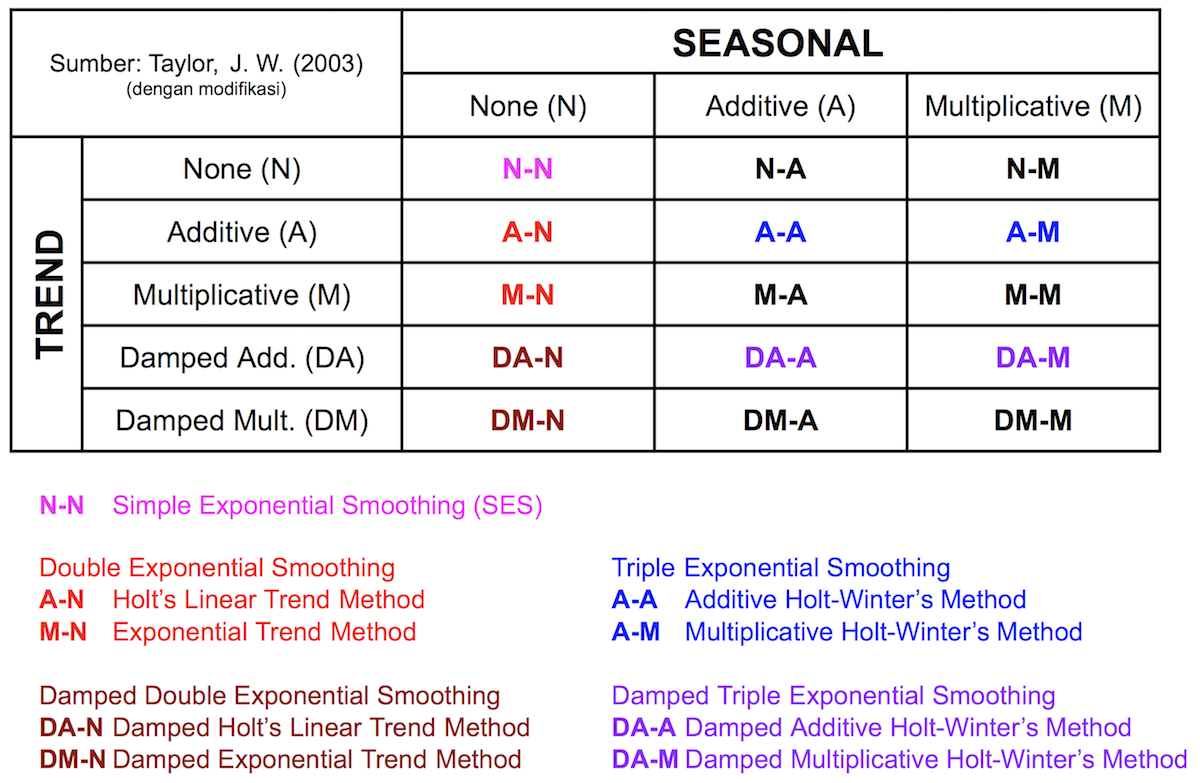

In [4]:
illustration.ets_model

# Exercise 1: Cheese Production Data

<AxesSubplot:xlabel='date'>

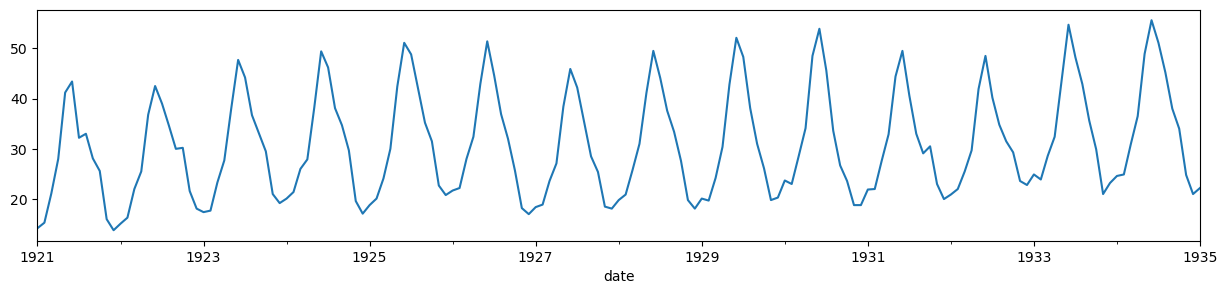

In [5]:
df = pd.read_csv("data/cheese_fred.csv", index_col='date', parse_dates=['date'])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

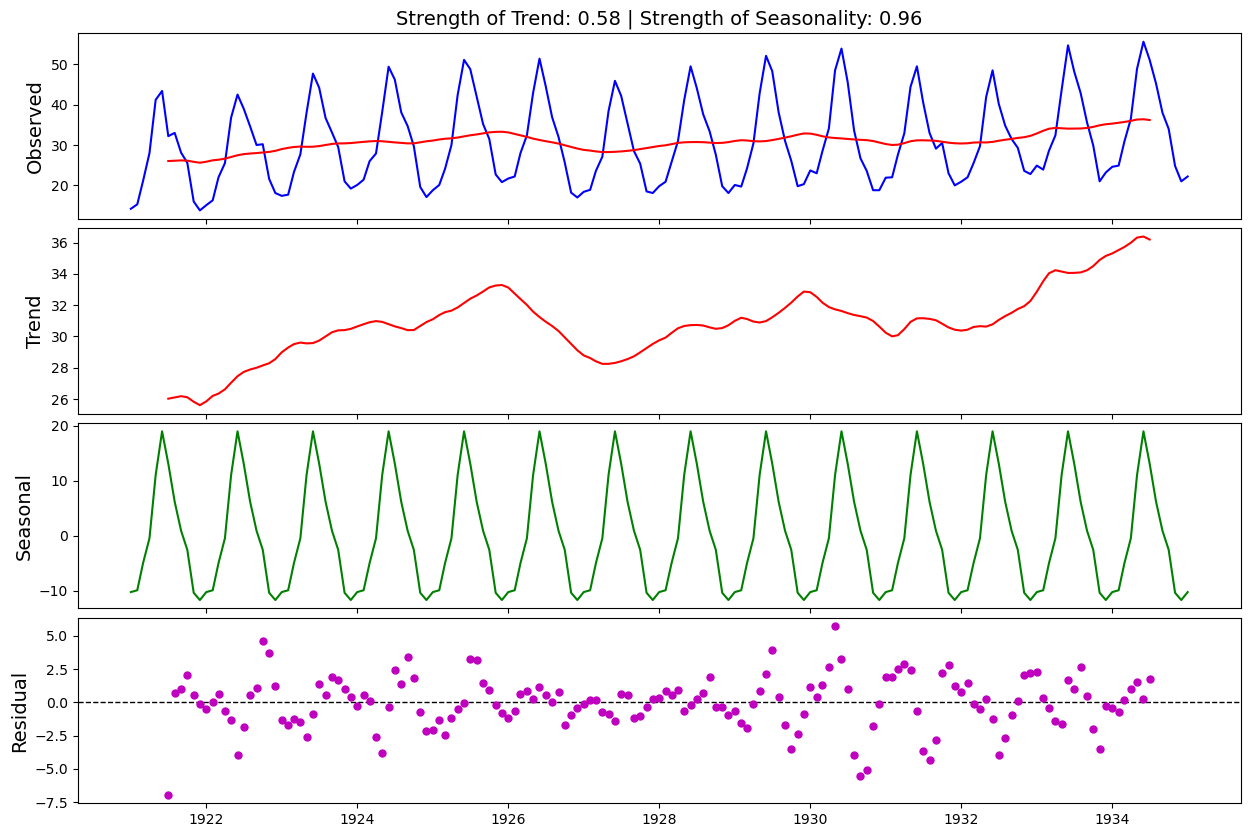

In [6]:
components = additive_decomposition(series, plot=True)

### Training 

In [9]:
es = ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)

In [12]:
model = es.fit(optimized=True)

### Forecast 

In [13]:
len(X_train)

144

In [16]:
len(X_test)

25

In [14]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

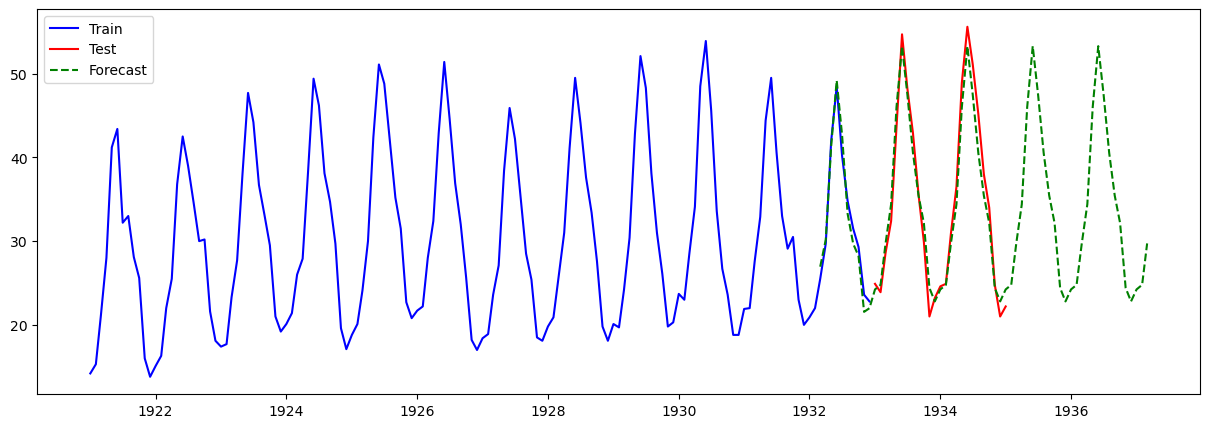

In [15]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="Train")
plt.plot(X_test, "r-", label="Test")
plt.plot(pred, "g--", label="Forecast")
plt.legend()

# Exercise 2: Airline Passenger Data

<AxesSubplot:xlabel='Date'>

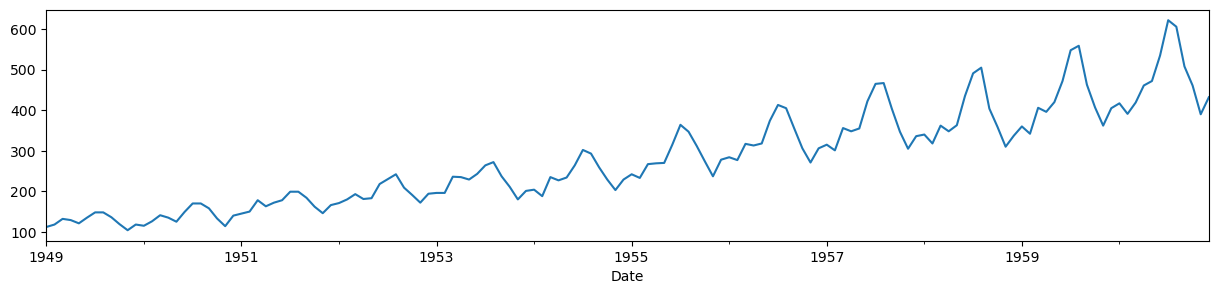

In [21]:
df = pd.read_csv("data/airline.csv", index_col='Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

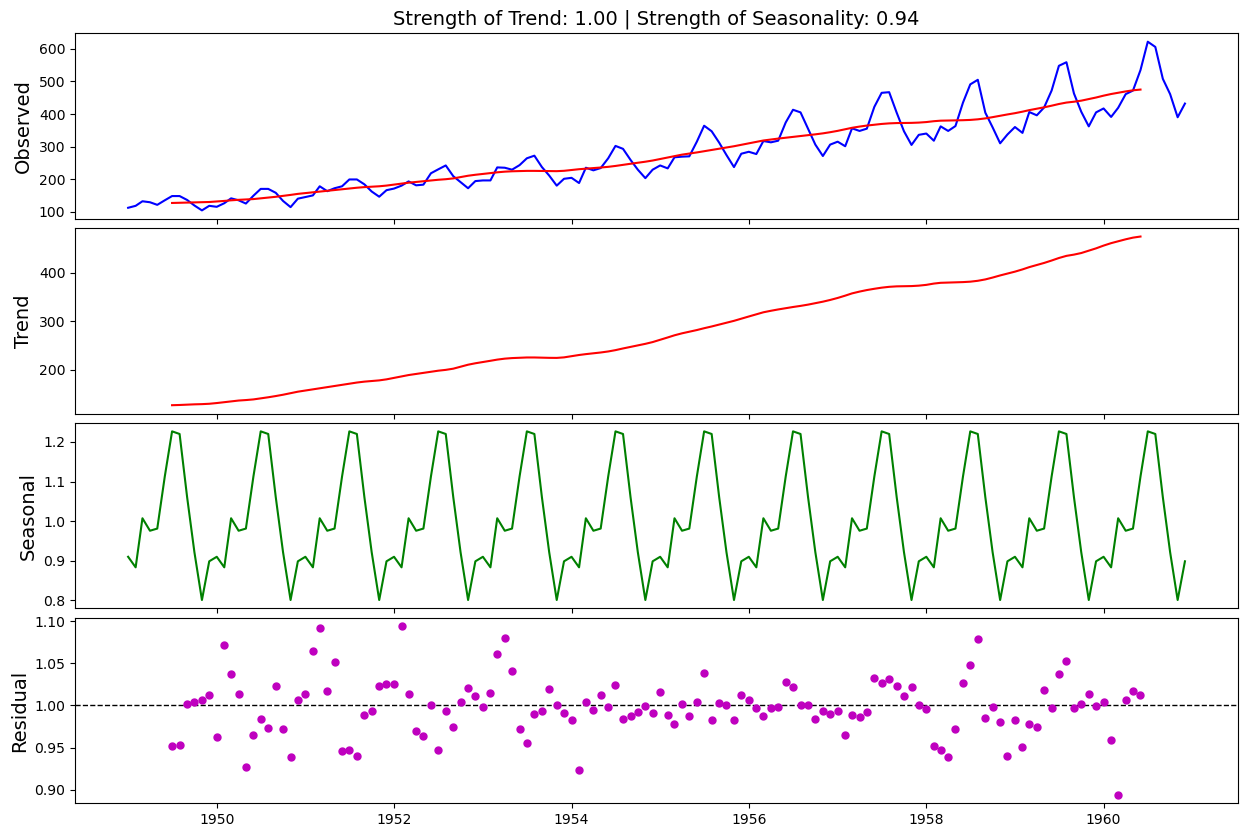

In [20]:
components = multiplicative_decomposition(series, plot=True)

### Training 

In [40]:
es = ExponentialSmoothing(X_train, trend="add", seasonal="mul", seasonal_periods=12)

E:\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model = es.fit(optimized=True)

### Forecast 

In [43]:
len(X_train)

119

In [44]:
len(X_test)

25

In [45]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

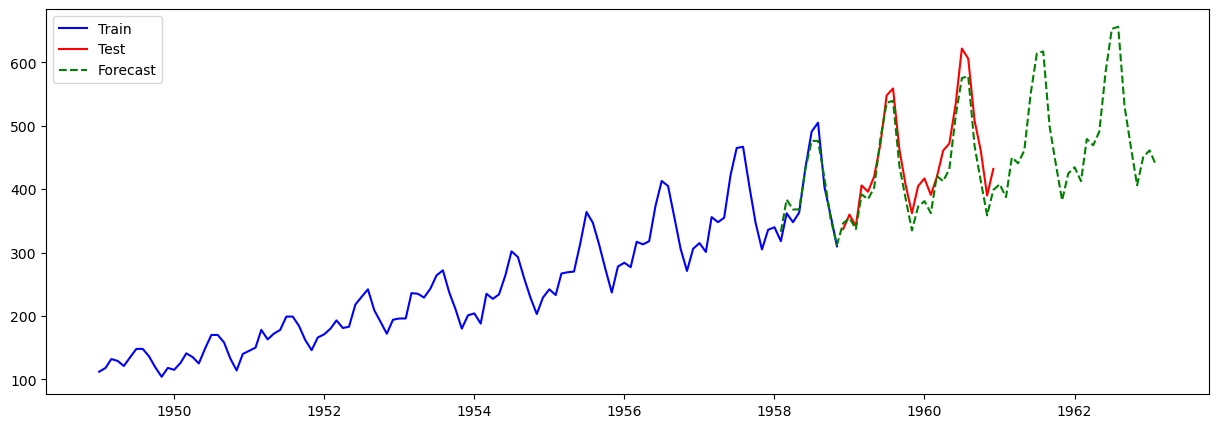

In [46]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="Train")
plt.plot(X_test, "r-", label="Test")
plt.plot(pred, "g--", label="Forecast")
plt.legend()

# Exercise 3: Christmas Search Interest

<AxesSubplot:xlabel='date'>

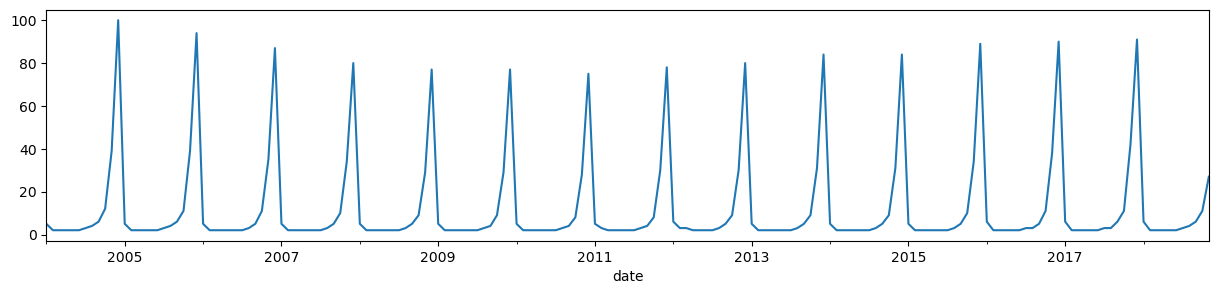

In [47]:
df = pd.read_csv("data/christmas.csv", index_col='date', parse_dates=['date'])
series = df.interest
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [65]:
df.head()

,interest
date,
2004-01-01,5
2004-02-01,2
2004-03-01,2
2004-04-01,2
2004-05-01,2


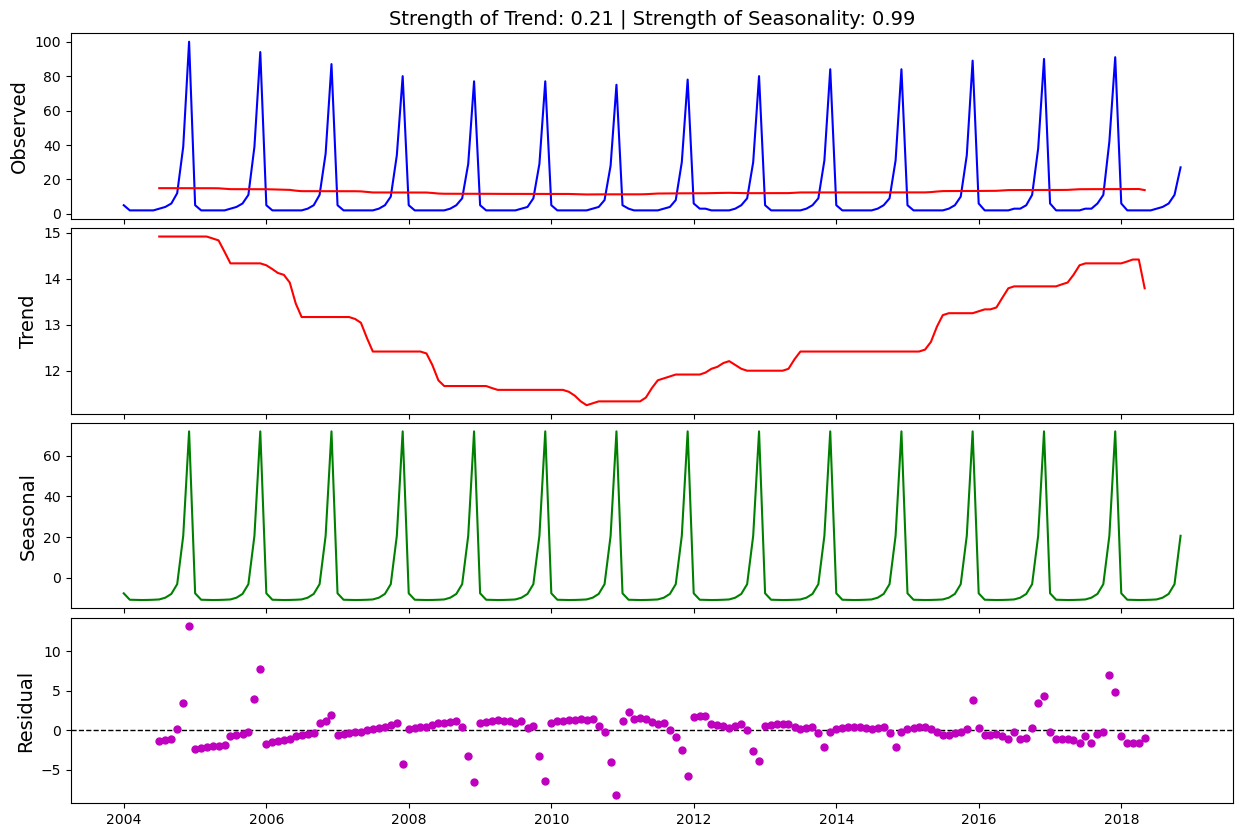

In [48]:
components = additive_decomposition(series, plot=True)

### Training 

In [76]:
es = ExponentialSmoothing(X_train, seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True)

E:\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Forecast

In [77]:
len(X_train)

154

In [78]:
len(X_test)

25

In [79]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

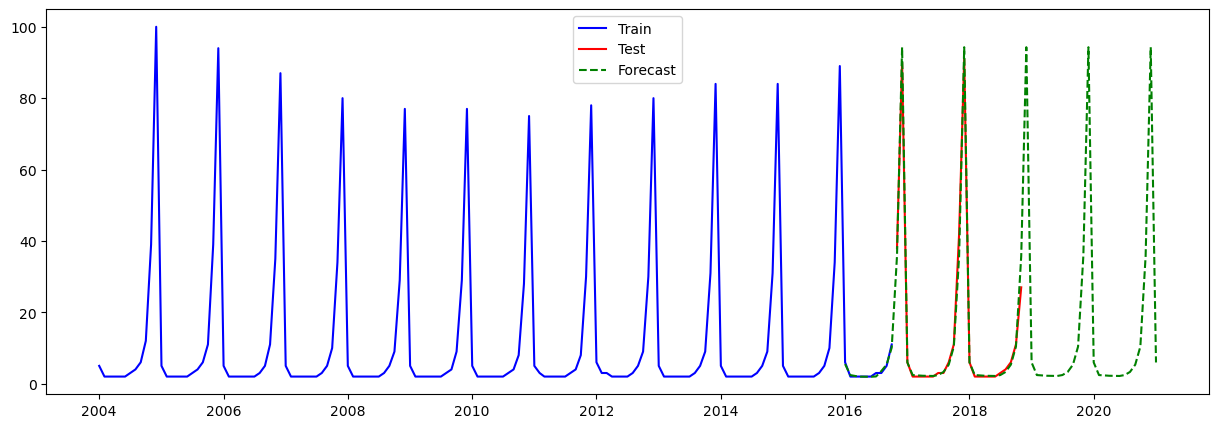

In [80]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="Train")
plt.plot(X_test, "r-", label="Test")
plt.plot(pred, "g--", label="Forecast")
plt.legend()

# Exercise 4: Champagne Sales

<AxesSubplot:xlabel='date'>

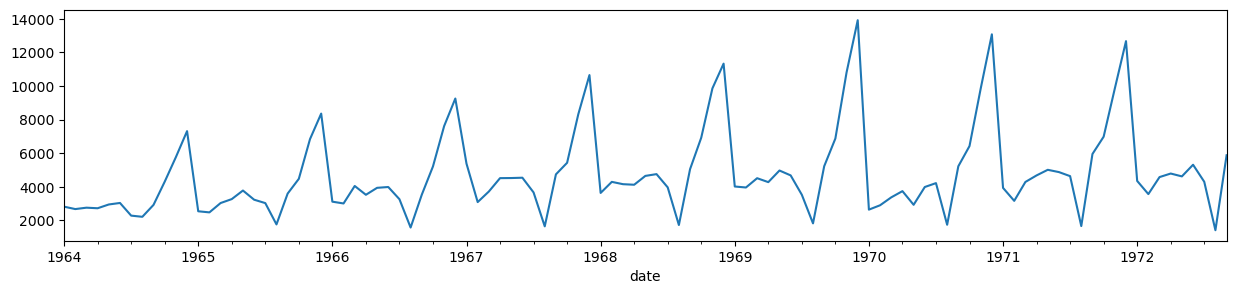

In [81]:
df = pd.read_csv("data/perrin_freres_champagne.csv", index_col='date', parse_dates=['date'])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

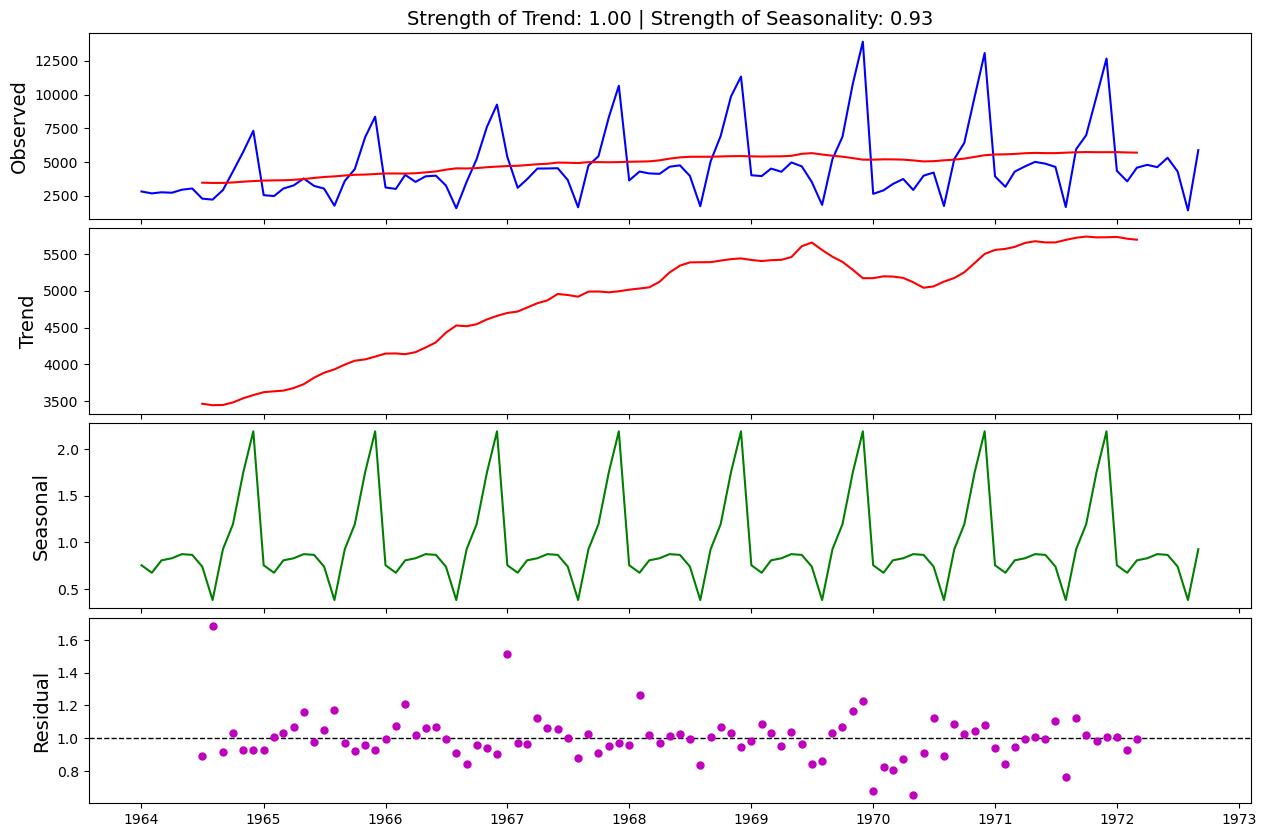

In [83]:
components = multiplicative_decomposition(series, plot=True)

### Training 

In [99]:
es = ExponentialSmoothing(X_train, seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True)

E:\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Forecast

In [100]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

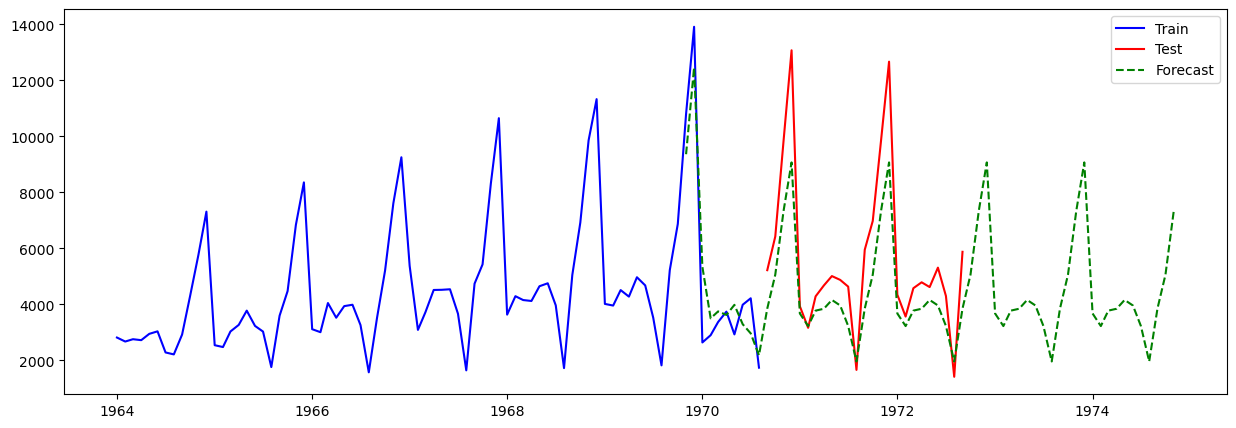

In [101]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="Train")
plt.plot(X_test, "r-", label="Test")
plt.plot(pred, "g--", label="Forecast")
plt.legend()

# Auto ETS

In [106]:
from jcopml.time_series import auto_ets

<AxesSubplot:xlabel='Date'>

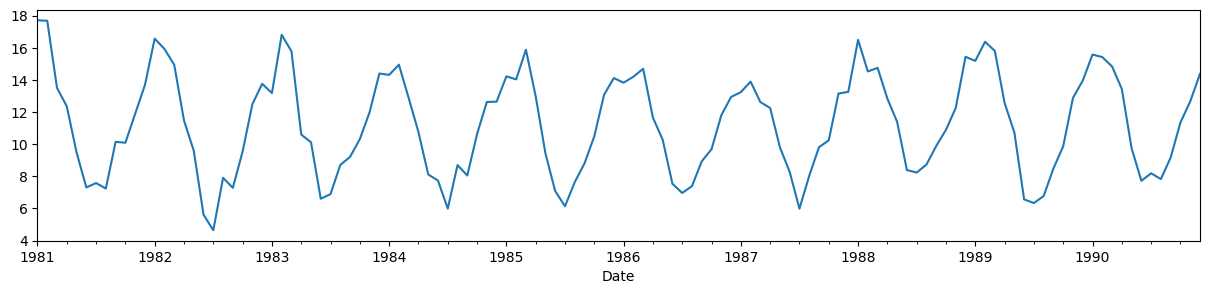

In [107]:
df = pd.read_csv("data/daily_min_temp.csv", index_col='Date', parse_dates=['Date'])
df = df.resample("M").mean()
series = df.Temp
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [109]:
model, cv_results = auto_ets(X_train)

  0%|          | 0/30 [00:00<?, ?it/s]

IndexError: single positional indexer is out-of-bounds

In [112]:
cv_results.head()

NameError: name 'cv_results' is not defined